# Table of Contents
* [Using a lattice](#Using-a-lattice)
	* [Generating some random extensive variable for the threshold (`pop`) and for the attributes (`income_pp`)](#Generating-some-random-extensive-variable-for-the-threshold-%28pop%29-and-for-the-attributes-%28income_pp%29)
	* [Queen matrix](#Queen-matrix)
	* [Rook matrix](#Rook-matrix)
* [Default Max-P](#Default-Max-P)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [Basic Tabu Local Search](#Basic-Tabu-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [AZP Local Search](#AZP-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [AZP Tabu Local Search](#AZP-Tabu-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [Reactive Tabu Local Search](#Reactive-Tabu-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)
* [AZP Simulated Annealing Local Search](#AZP-Simulated-Annealing-Local-Search)
	* [Queen](#Queen)
	* [Rook](#Rook)


In [1]:
%matplotlib inline

import geopandas as gpd
import numpy as np
from pysal.viz.splot.libpysal import plot_spatial_weights
from libpysal.weights import Queen, Rook
from region.max_p_regions.heuristics import MaxPRegionsHeu
from region.p_regions.azp import *

# Using a lattice

In [2]:
gdf = gpd.read_file('reg_lat_10_10.shp')

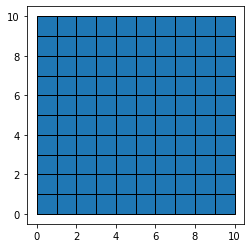

In [3]:
gdf.plot(edgecolor = 'black')

## Generating some random extensive variable for the threshold (`pop`) and for the attributes (`income_pp`)

In [4]:
np.random.seed(123)
gdf['pop'] = np.random.randint(500, high=1000, size=100)

In [5]:
np.random.seed(123)
gdf['income_pp'] = np.random.uniform(low=50000, high=100000, size=100)

In [6]:
w_queen = Queen.from_dataframe(gdf)
w_rook = Rook.from_dataframe(gdf)

## Queen matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x239f11719b0>)

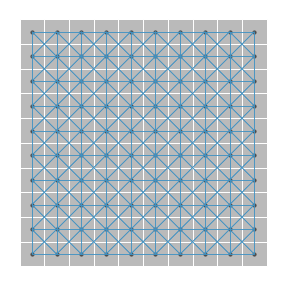

In [7]:
plot_spatial_weights(w_queen, gdf, figsize = (5, 5))

## Rook matrix

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x239f13414a8>)

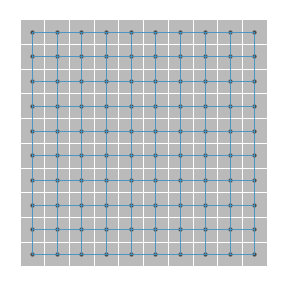

In [8]:
plot_spatial_weights(w_rook, gdf, figsize = (5, 5))

In [9]:
values_gdf = gdf[['income_pp']]
spatially_extensive_attr_gdf = gdf[['pop']].values

# Default Max-P

## Queen

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for r

I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I cha

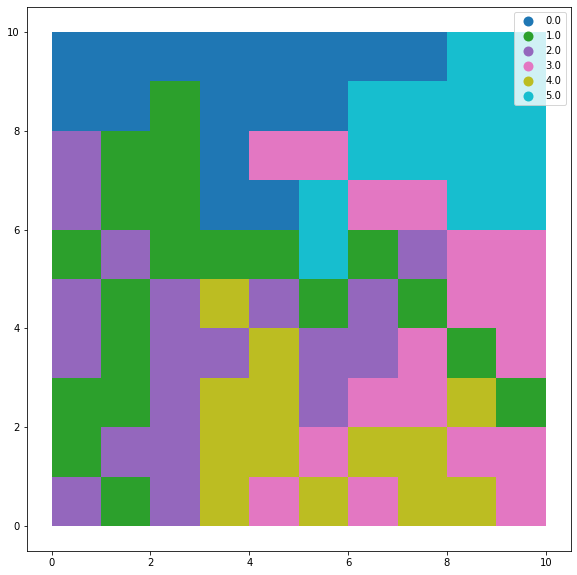

In [10]:
model = MaxPRegionsHeu(random_state=1)
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [11]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    11259
1.0    14438
2.0    14267
3.0    13637
4.0    10331
5.0    11444
Name: pop, dtype: int32

## Rook

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for r

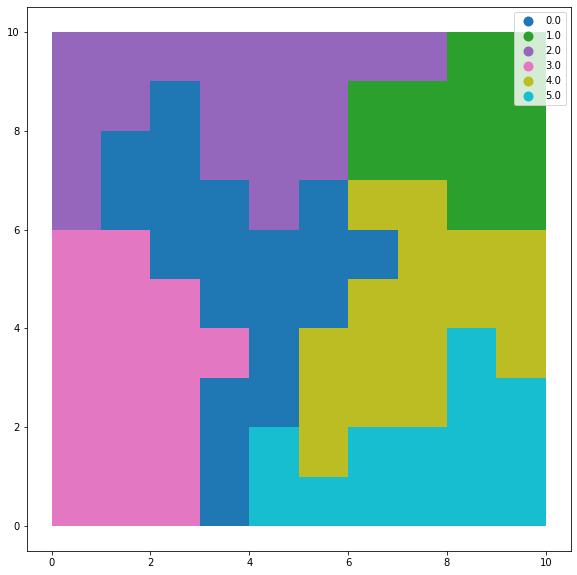

In [12]:
model = MaxPRegionsHeu(local_search = AZP(), random_state=1)
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [13]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    15056
1.0    10200
2.0    13282
3.0    13123
4.0    13280
5.0    10435
Name: pop, dtype: int32

# Basic Tabu Local Search

## Queen

Ensuring threshold in each region.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop

Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop o

Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of

Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Ensuring threshold in each region.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is Tr

Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is Tr

Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining of _azp_connected_component!
WILL CHECK FEASIBILITY NOW.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is True for connection.
Beggining loop of assert_feasible!
Region 3 is True for connection.
Beggining loop of assert_feasible!
Region 4 is True for connection.
Beggining loop of assert_feasible!
Region 5 is True for connection.
Beggining loop of assert_feasible!
Region 0 is True for connection.
Beggining loop of assert_feasible!
Region 1 is True for connection.
Beggining loop of assert_feasible!
Region 2 is Tr

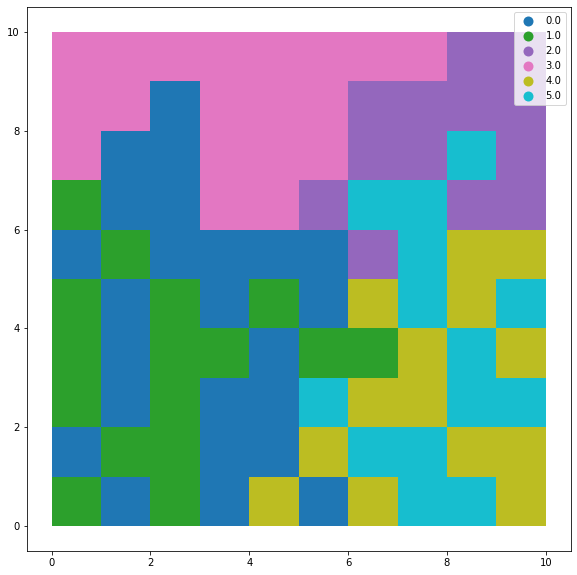

In [10]:
model = MaxPRegionsHeu(local_search = AZPBasicTabu(), random_state=1)
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [11]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    17264
1.0    12021
2.0    10708
3.0    13587
4.0    10986
5.0    10810
Name: pop, dtype: int32

## Rook

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I'm alive 11!
WILL CHECK FEASIBILITY NOW.
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I'm alive 11!
WILL CHECK FEASIBILITY NOW.
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I a

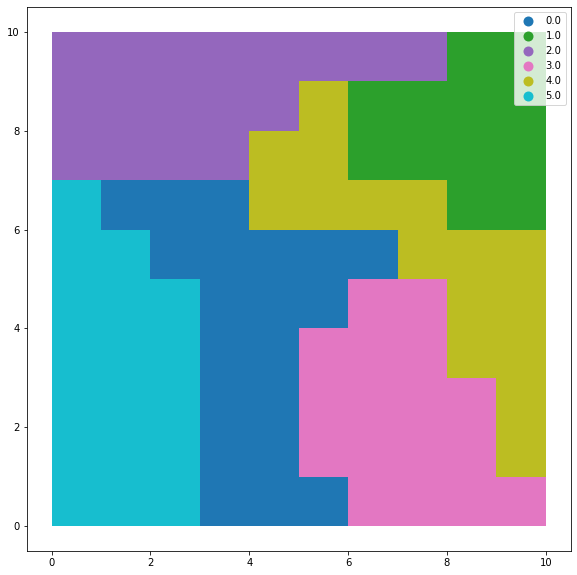

In [12]:
model = MaxPRegionsHeu(local_search = AZPBasicTabu(), random_state=2)
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [13]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    14942
1.0    10200
2.0    11611
3.0    13788
4.0    11697
5.0    13138
Name: pop, dtype: int32

# AZP Local Search

## Queen

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 6


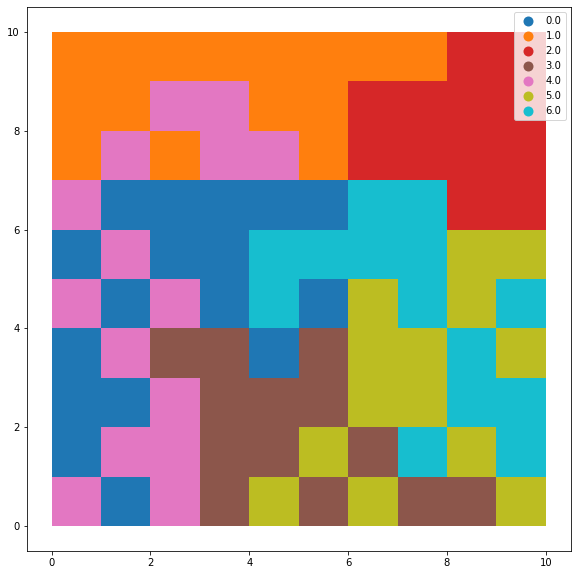

In [18]:
model = MaxPRegionsHeu(local_search = AZP(), random_state=3)
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [19]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    12654
1.0    10692
2.0    10200
3.0    10253
4.0    10264
5.0    11114
6.0    10199
Name: pop, dtype: int32

## Rook

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 6


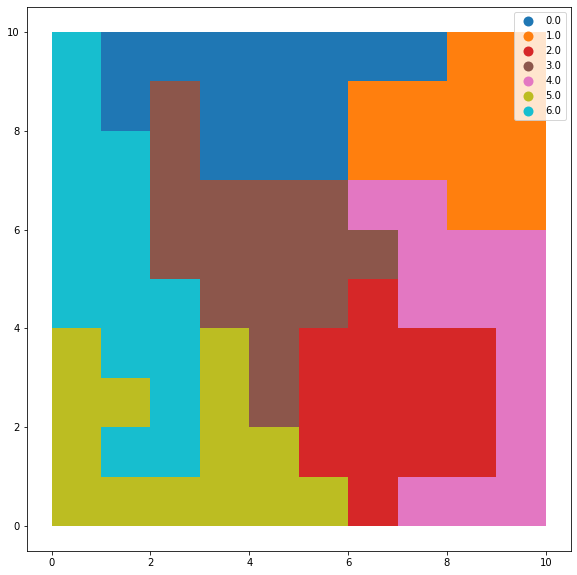

In [20]:
model = MaxPRegionsHeu(local_search = AZP(), random_state=3)
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [21]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    10273
1.0    10200
2.0    11643
3.0    12049
4.0    10143
5.0    10549
6.0    10519
Name: pop, dtype: int32

# AZP Tabu Local Search

## Queen

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for r

I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I cha

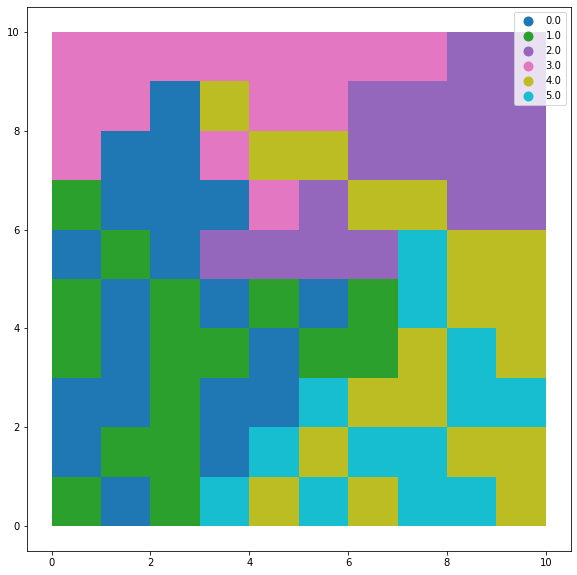

In [22]:
model = MaxPRegionsHeu(local_search = AZPTabu(), random_state=1)
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [23]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    14887
1.0    12093
2.0    13609
3.0    10473
4.0    14184
5.0    10130
Name: pop, dtype: int32

## Rook

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for r

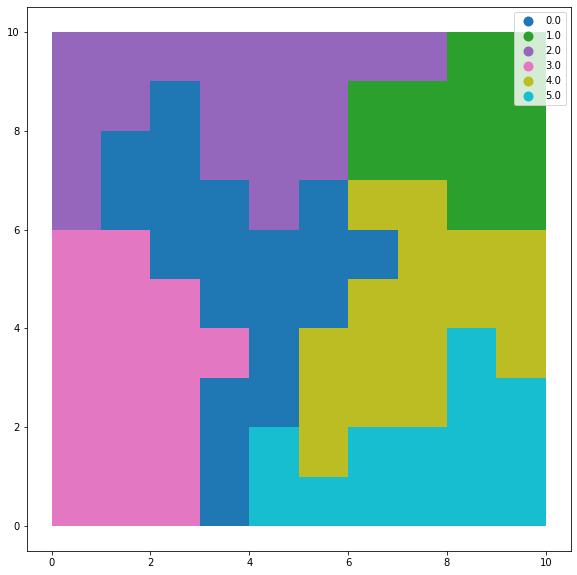

In [24]:
model = MaxPRegionsHeu(local_search = AZPTabu(), random_state=1)
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [25]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    15056
1.0    10200
2.0    13282
3.0    13123
4.0    13280
5.0    10435
Name: pop, dtype: int32

# Reactive Tabu Local Search

## Queen

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for r

I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I cha

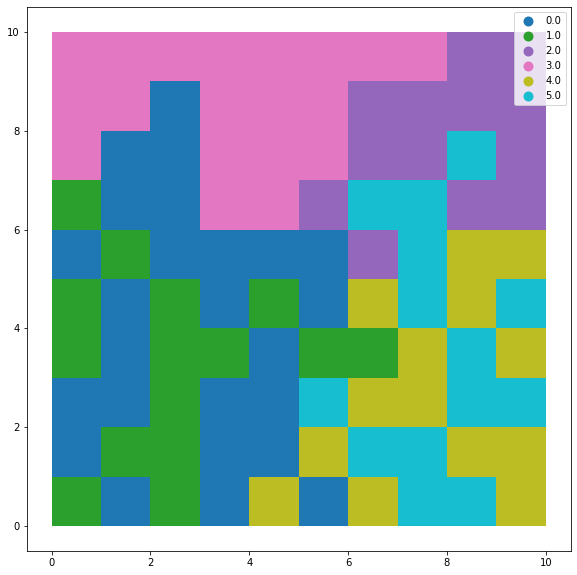

In [26]:
model = MaxPRegionsHeu(local_search = AZPReactiveTabu(max_iterations = 2, k1 = 2, k2 = 2), random_state=1)
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [27]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    18086
1.0    11199
2.0    10708
3.0    13587
4.0    10986
5.0    10810
Name: pop, dtype: int32

## Rook

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for r

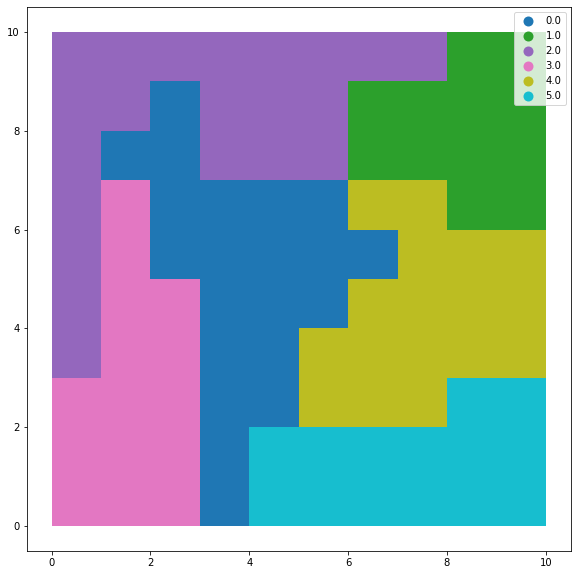

In [28]:
model = MaxPRegionsHeu(local_search = AZPReactiveTabu(max_iterations = 2, k1 = 2, k2 = 2), random_state=1)
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [29]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    15691
1.0    10200
2.0    14906
3.0    10864
4.0    13185
5.0    10530
Name: pop, dtype: int32

# AZP Simulated Annealing Local Search

## Queen

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 6


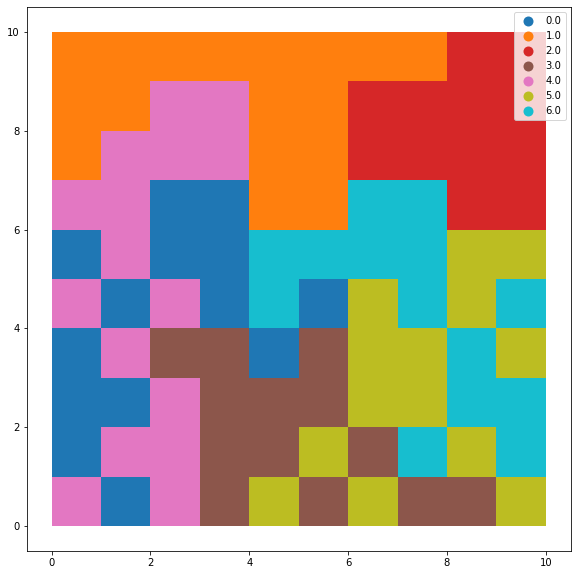

In [30]:
model = MaxPRegionsHeu(local_search = AZPSimulatedAnnealing(init_temperature=1), random_state=3)
model.fit_from_w(w_queen, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [31]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    10759
1.0    12302
2.0    10200
3.0    10253
4.0    10549
5.0    11114
6.0    10199
Name: pop, dtype: int32

## Rook

I changed 2!
I am True for region 0
I changed 2!
I am True for region 1
I changed 2!
I am True for region 2
I changed 2!
I am True for region 3
I changed 2!
I am True for region 4
I changed 2!
I am True for region 5
I changed 2!
I am True for region 6


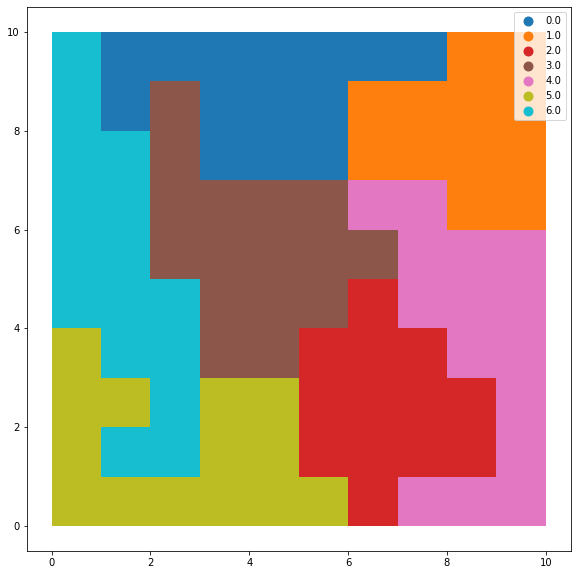

In [32]:
model = MaxPRegionsHeu(local_search = AZPSimulatedAnnealing(init_temperature=1), random_state=3)
model.fit_from_w(w_rook, values_gdf.values, spatially_extensive_attr_gdf, threshold = 10000)
gdf['labels'] = model.labels_
gdf.plot(column = 'labels', categorical = True, figsize = (10, 10), legend = True)

In [33]:
gdf.groupby(['labels'])['pop'].sum()

labels
0.0    10273
1.0    10200
2.0    10888
3.0    11690
4.0    10898
5.0    10908
6.0    10519
Name: pop, dtype: int32